# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

<IPython.core.display.Javascript object>


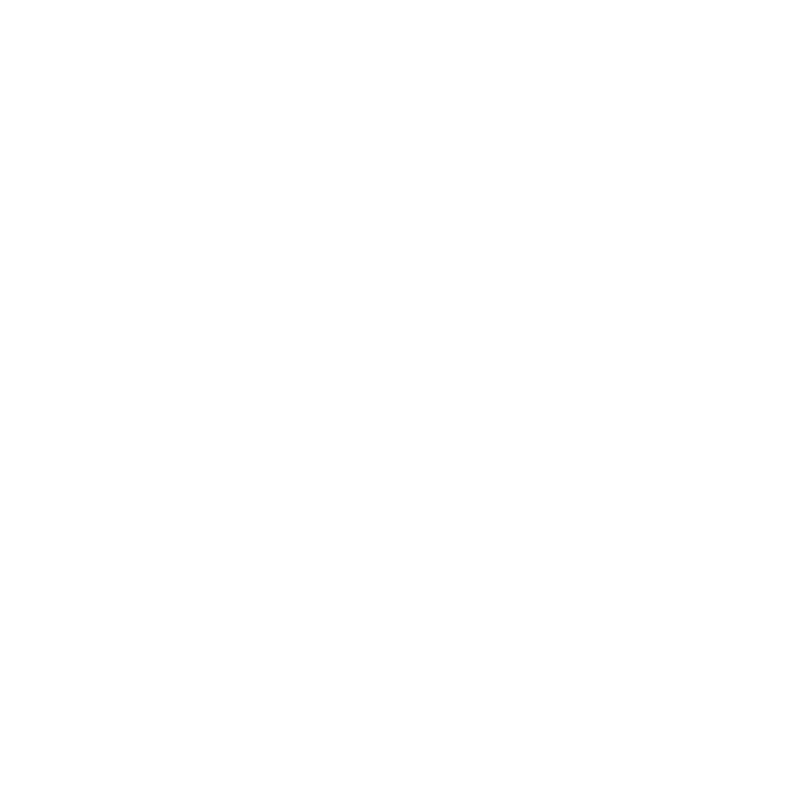

/home/laira/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [1]:
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import datetime

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [2]:
df = pd.read_fwf('RPW00041229.dly.txt', header=None)
cols = ['orig']
for i in range(1,30):
    if(i < 4):
        cols.append('Value' + str(i+1))
    elif(i+1 <= 16):
        cols.append('Value' + str(i+2))
    else:
        cols.append('Value' + str(i+3))
df.columns = cols
del df['Value32']

df

,orig,Value2,Value3,Value4,Value6,Value7,Value8,Value9,Value10,Value11,...,Value22,Value23,Value24,Value25,Value26,Value27,Value28,Value29,Value30,Value31
0,RPW00041229194701TMAX 317,X 272,X 306,X 294 X 328,X 311,X 317,X 311,X 317,X 317,X 322,...,X 317,X 322,X 328,X 311,X 289,X 300,X 289,X 289,X 294,X 300
1,RPW00041229194701TMIN 206,X 222,X 211,X 200 X 189,X 217,X 222,X 211,X 200,X 200,X 206,...,X 200,X 228,X 211,X 200,X 206,X 217,X 211,X 194,X 228,X 217
2,RPW00041229194701PRCP 0,X-9999,-9999,0 X 0,X-9999,18,X 0,X 0T,X 0,X 0,...,X 0,X 0,X-9999,-9999,-9999,-9999,-9999,-9999,36,X-9999
3,RPW00041229194701SNOW 0,X-9999,-9999,0 X 0,X-9999,0,X 0,X 0,X 0,X 0,...,X 0,X 0,X-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
4,RPW00041229194701WT01-9999,-9999,-9999,-9999 -9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,1,X 1,X-9999,-9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1831,RPW00041229201912TAVG 274H,S 276H,S 254H,S 291H S 281H,S 277H,S 278H,S 272H,S 273H,S 271H,S 277H,...,S 280H,S 272H,S 284H,S 261H,S 283H,S 289H,S 287H,S 287H,S 279H,S 277H
1832,RPW00041229202001TMAX 296,S 312,S 307,S 308 S 304,S 310,S 306,S 312,S 301,S-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1833,RPW00041229202001TMIN 249,S 243,S-9999,225 S 240,S 255,S 245,S 244,S 246,S 244,S 235,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999
1834,RPW00041229202001PRCP 3,S 3,S 0,S-9999 -9999,-9999,-9999,-9999,-9999,-9999,-9999,...,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999,-9999


In [3]:
def split_string(x):
    # split date and temperature
    s = x[11:]
    v = None
    temp = None
    if(s[6:10] == 'TMAX' or s[6:10] == 'TMIN'):
        v = s[6:10]
        if(len(s.split(' ')) <= 1):
            v = None
        else:
            temp = int(s.split(' ')[-1])
    return {'orig' : x, 'ID' : 'RPW00041229', 'Year' : int(s[:4]), 'Date' : datetime.date(int(s[:4]), int(s[4:6]), 1), 'Element' : v, 'Data_Value' : temp}

# split date and temperature
year_month_val = list(map(split_string, df.iloc[:,0]))

climate = pd.DataFrame(year_month_val).dropna()

# print(climate.to_string())

def get_num(n):
    nums = []
    for s in n.split():
        ans = ''
        for c in s:
            if(c.isdigit()):
                ans += c
            elif(c == '-'):
                ans += c
        if(len(ans) > 0):
            nums.append(int(ans))
    if(len(nums) == 1):
        return nums[0]
    elif(len(nums) > 1):
        return nums
    else:
        return None

# extract days for each month
# note: column 3 and 15 contains 2 days
def extract_days(ind,x):
    # locate row by date and element
    rows = []
    row = df.loc[index]
    s = row['orig'][11:]
    for i in range(2,31):
        if(i == 5 or i == 18):
            continue
        isValidDate = True
        try:
            datetime.date(int(s[:4]), int(s[4:6]), i)
        except:
            isValidDate = False
        
        col = 'Value' + str(i)
        if(isValidDate):
            if(i == 4 or i == 17):
                twos = []
                splt = row[col]
                num = get_num(splt)
                if(num is None):
                    continue
                list(map(lambda x : twos.append(int(x)), num))
                rows.append({'orig' : x,
                             'ID' : 'RPW00041229', 
                             'Year' : int(s[:4]),
                             'Date' : datetime.date(int(s[:4]), int(s[4:6]), i),
                             'Element' : s[6:10],
                             'Data_Value' : twos[0]})
                rows.append({'orig' : x,
                             'ID' : 'RPW00041229', 
                             'Year' : int(s[:4]),
                             'Date' : datetime.date(int(s[:4]), int(s[4:6]), i+1),
                             'Element' : s[6:10],
                             'Data_Value' : twos[1]})
            else:
                rows.append({'orig' : x, 
                             'ID' : 'RPW00041229',
                             'Year' : int(s[:4]),
                             'Date' : datetime.date(int(s[:4]), int(s[4:6]), i),
                             'Element' : s[6:10],
                             'Data_Value' : int(get_num(row[col]))})
    return rows

for index,orig in df.iterrows():
    rows = extract_days(index,orig)
    if(orig.orig.split('RPW00041229')[1][6:10] == 'TMAX' or orig.orig.split('RPW00041229')[1][6:10] == 'TMIN'):
        climate = climate.append(rows, ignore_index = True)

del climate['orig']

climate

,ID,Year,Date,Element,Data_Value
0,RPW00041229,1947,1947-01-01,TMAX,317.0
1,RPW00041229,1947,1947-01-01,TMIN,206.0
2,RPW00041229,1947,1947-02-01,TMAX,283.0
3,RPW00041229,1947,1947-02-01,TMIN,217.0
4,RPW00041229,1947,1947-03-01,TMAX,339.0
...,...,...,...,...,...
27003,RPW00041229,2020,2020-01-26,TMIN,-9999.0
27004,RPW00041229,2020,2020-01-27,TMIN,-9999.0
27005,RPW00041229,2020,2020-01-28,TMIN,-9999.0
27006,RPW00041229,2020,2020-01-29,TMIN,-9999.0


In [4]:
# record high and low temperatures during 2005-2014
climate10years = climate.where(climate['Year'] >= 2005).where(climate['Year'] <= 2014).dropna()

# drop None values
climate10years.drop(climate10years[climate10years['Data_Value'] == -9999].index, inplace=True)

# drop rows with only one max or min
missing_values = climate10years.groupby('Date').size()
missing_values = missing_values[missing_values < 2]
climate10years = climate10years[~climate10years['Date'].isin(missing_values.index)]

climate10years = climate10years.sort_values(by=['Date'])

tmax = climate10years.where(climate10years['Element'] == 'TMAX').dropna()['Data_Value']
tmin = climate10years.where(climate10years['Element'] == 'TMIN').dropna()['Data_Value']

print(tmax, tmin)

16564    278.0
16565    285.0
16567    300.0
16570    290.0
16571    298.0
         ...  
23454    315.0
23455    300.0
23456    312.0
23457    295.0
23458    284.0
Name: Data_Value, Length: 2288, dtype: float64 16593    222.0
16594    240.0
16596    235.0
16599    210.0
16600    230.0
         ...  
23483    240.0
23484    240.0
23485    235.0
23486    225.0
23487    235.0
Name: Data_Value, Length: 2288, dtype: float64


<IPython.core.display.Javascript object>


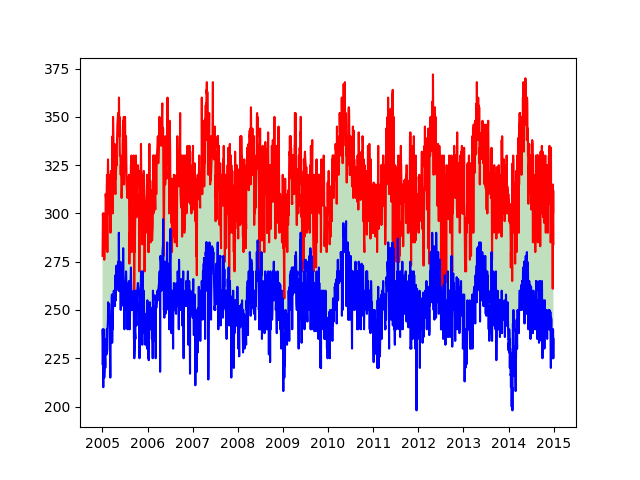

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

line = plt.figure()

dates = pd.to_datetime(climate10years.where(climate10years['Element'] == 'TMIN').dropna()['Date'])

plt.plot(dates, tmax, color='red')
plt.plot(dates, tmin, color='blue')
plt.gca().fill_between(dates,
                      tmax, tmin,
                      facecolor='green',
                      alpha=0.25)

In [6]:
# find tmax and tmin in 2015 that beat the record highs and lows of 2005-2014

# drop none values
climate.drop(climate[climate['Data_Value'] == -9999].index, inplace=True)

# drop rows with only one max or min
missing_values = climate.groupby('Date').size()
missing_values = missing_values[missing_values < 2]
climate = climate[~climate['Date'].isin(missing_values.index)]

# max/min per year
mx = (climate[climate['Element'] == 'TMAX']
      .groupby('Year')['Data_Value'].agg('max'))

mn = (climate[climate['Element'] == 'TMIN']
      .groupby('Year')['Data_Value'].agg('min'))

compmx = mx[(mx.index.values >= 2005) & (mx.index.values <= 2014)].agg('max')
compmn = mn[(mn.index.values >= 2005) & (mn.index.values <= 2014)].agg('min')

print(compmx, compmn)

372.0 198.0


In [7]:
# 2015 data
ref = climate[climate['Year'] == 2015].sort_values(by=['Date'])

# x
months_days = ref['Date'].drop_duplicates()
# y1
temp_mx = ref.where((ref['Element'] == 'TMAX') )['Data_Value'].dropna()
# y2
temp_mn = ref.where((ref['Element'] == 'TMIN') )['Data_Value'].dropna()

# break_mx = ref.where((ref['Element'] == 'TMAX') & (ref['Data_Value'] >= compmx))['Data_Value'].dropna()
# break_mn = ref.where((ref['Element'] == 'TMIN') & (ref['Data_Value'] <= compmn))['Data_Value'].dropna()

<IPython.core.display.Javascript object>


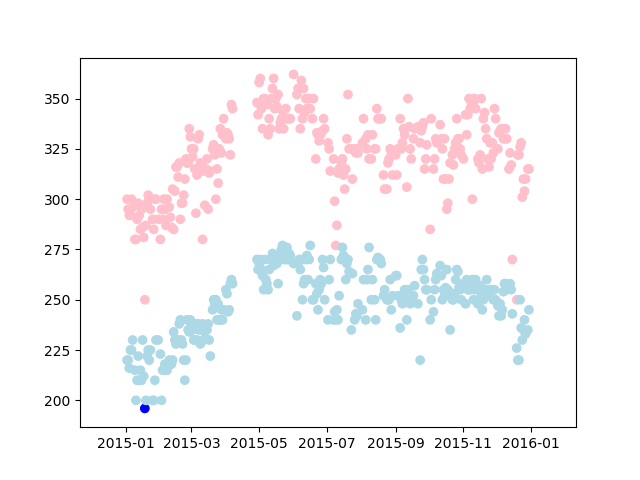

In [8]:
plt.figure()
colors_mx = np.where(temp_mx < compmx, 'pink', 'r')
colors_mn = np.where(temp_mn > compmn, 'lightblue', 'b')

plt.scatter(months_days, temp_mx, c=colors_mx)
plt.scatter(months_days, temp_mn, c=colors_mn)